# SPAM DETECTION

- The data is from UCI: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
- Let's discover the data. It consists of 5572 SMS messages. There are ham and spam messages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [355]:
data = pd.read_csv('messages.csv', encoding='latin-1')

In [356]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)


In [357]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [358]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


# Importing all the necessary libraries.

In [347]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from yellowbrick.text import FreqDistVisualizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

In [41]:
word_lemmatizer = WordNetLemmatizer()

# Let's create a function to get the pure text.

In [267]:
def cleaner(text):
    nopunc = [word for word in text if word not in string.punctuation ]
    nopunc = ''.join(nopunc)
    nosw = [text for text in nopunc.split() if text.lower() not in stopwords.words('english')]
    lwords = [x for x in nosw if len(x)>2]
    lemwords = [word_lemmatizer.lemmatize(t) for t in lwords]
    words = [a for a in lemwords if not any(x.isdigit() for x in a)]
    return words

In [268]:
data['v3'] = data['v2'].apply(cleaner)

In [269]:
data.drop('v2', axis=1, inplace=True)

In [270]:
data.head()

,v1,v3
0,ham,"[jurong, point, crazy, Available, bugis, great..."
1,ham,"[lar, Joking, wif, oni]"
2,spam,"[Free, entry, wkly, comp, win, Cup, final, tkt..."
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[Nah, dont, think, go, usf, life, around, though]"


# Creating a frequency distribution.

In [271]:
ham = data[data['v1']=='ham']

In [272]:
spam = data[data['v1']=='spam']

In [273]:
cv = CountVectorizer()

In [274]:
spamX = sum(spam['v3'],[])

In [275]:
hamX = sum(ham['v3'],[])

In [276]:
spamdoc = cv.fit_transform(spamX)

In [277]:
featuresspam = cv.get_feature_names()

# Frequency distribution of the words in spam messages.

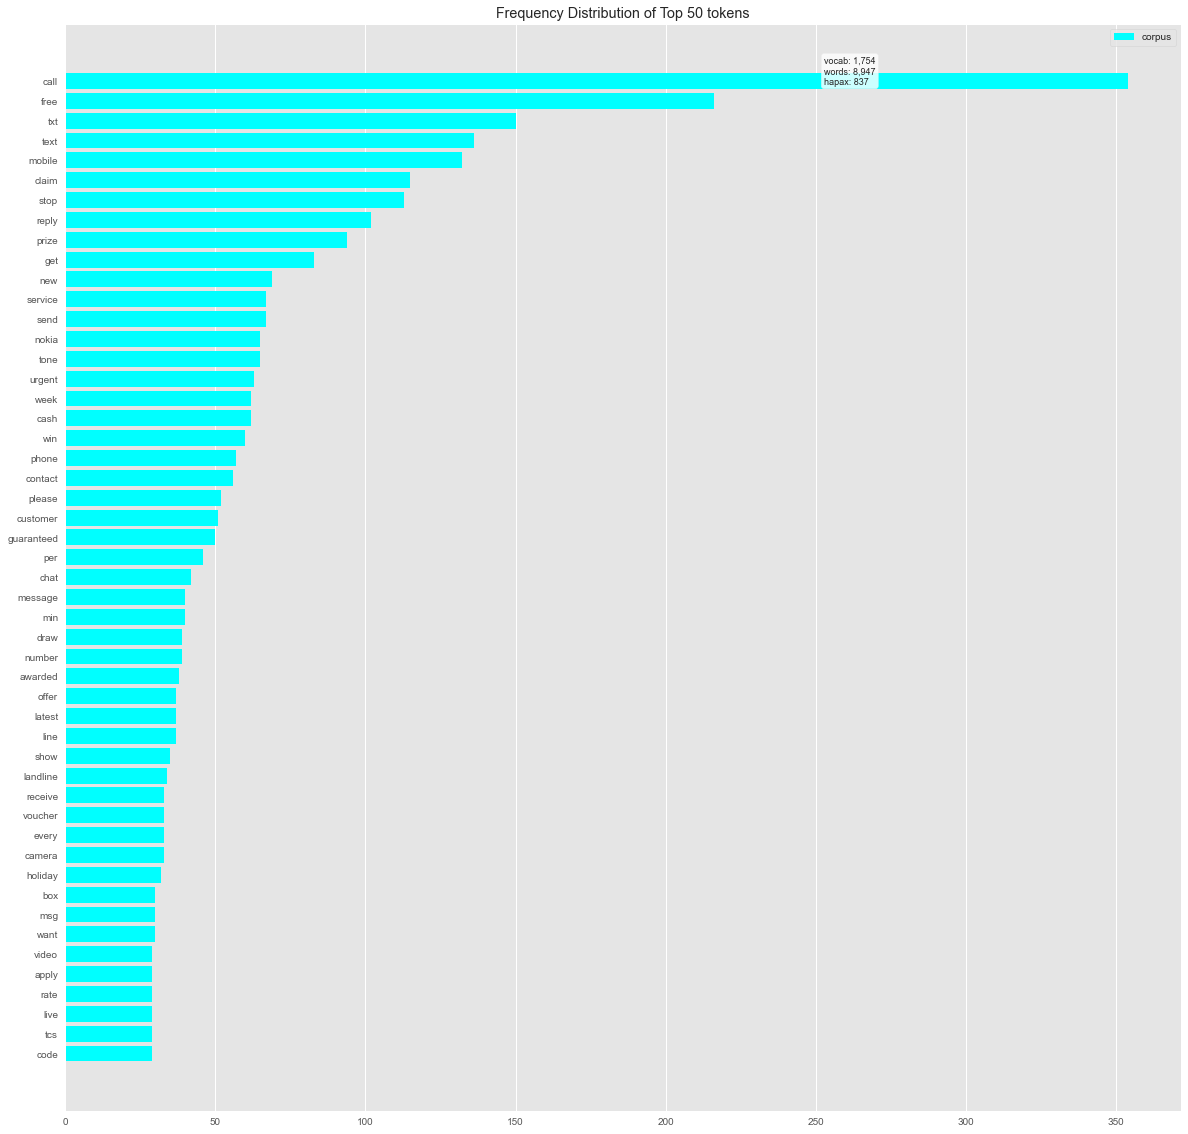

In [278]:
plt.figure(figsize=(20,20))
visualizer = FreqDistVisualizer(features=featuresspam, orient='h', color='aqua')
visualizer.fit(spamdoc)
visualizer.show()

# Creating a word cloud for frequently used words in spam messages.


In [288]:
def wc(label):
  word = ''
  for txt in data[data['v1'] == label]['v3']:
    for x in txt:
        x = x.lower()
        word += x + ' '
  wordcloud = WordCloud(width=400, height=200).generate(word)
  plt.title('Word Cloud of the most used words in '+label)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

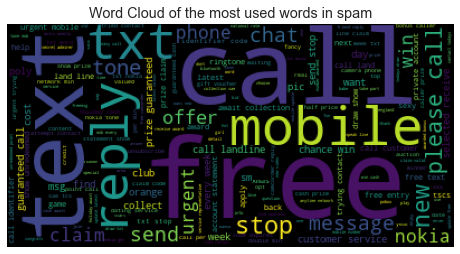

In [289]:
wc('spam')

In [290]:
hamdoc = cv.fit_transform(hamX)

In [291]:
featuresham = cv.get_feature_names()

# Frequency distribution of the words in ham messages.

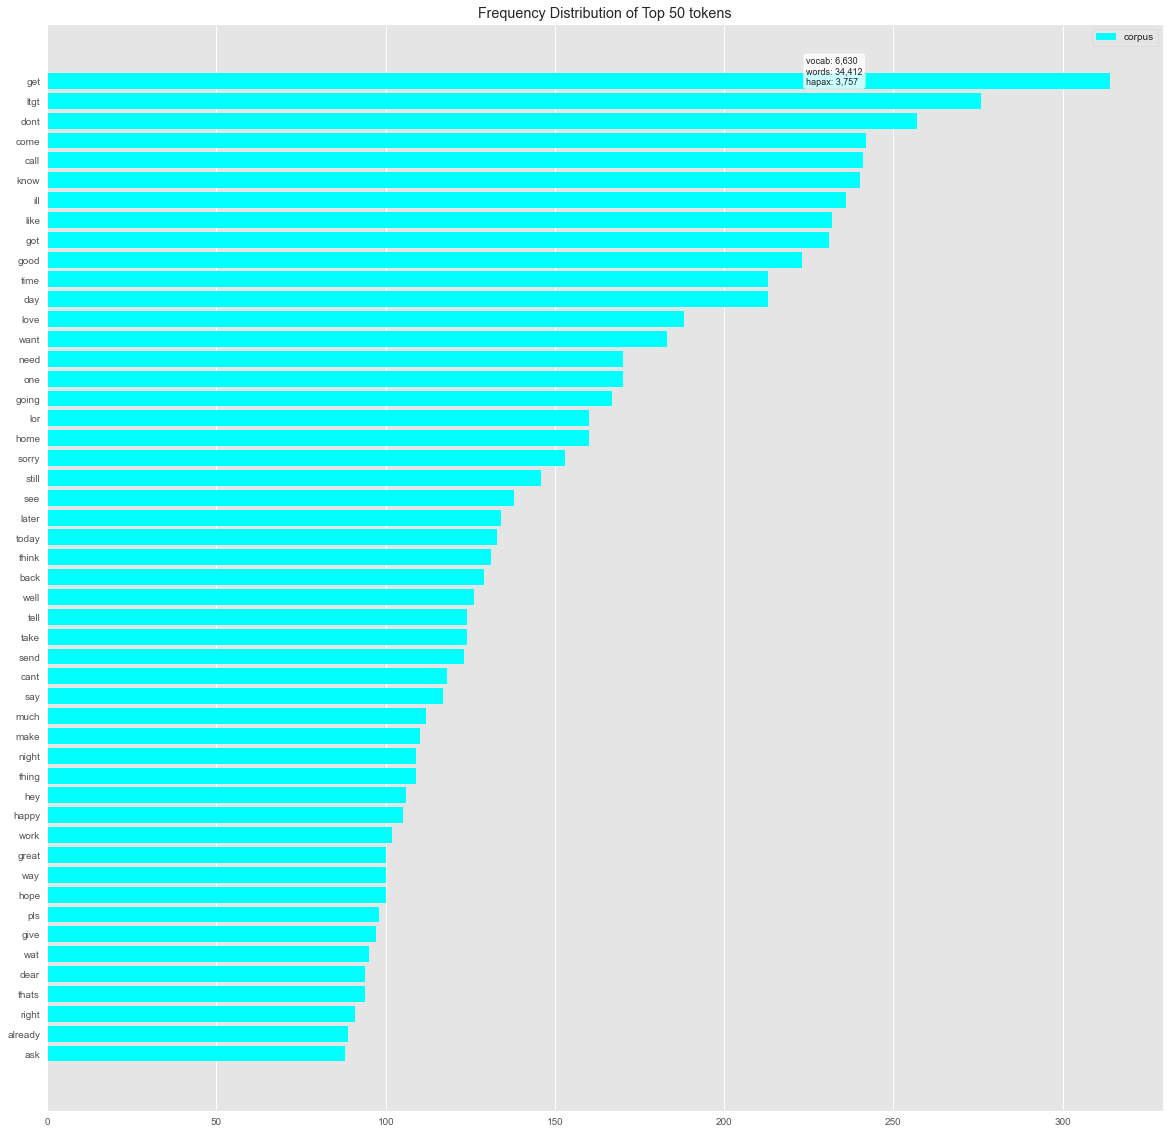

In [292]:
plt.figure(figsize=(20,20))
visualizer = FreqDistVisualizer(features=featuresham, orient='h', color='aqua')
visualizer.fit(hamdoc)
visualizer.show()

# Creating a word cloud for frequently used words in ham messages.


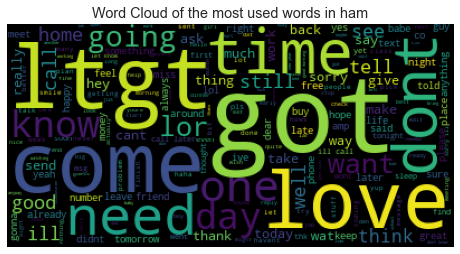

In [293]:
wc('ham')

# Let's build a Multinomial Naive Bayes model that predicts if a SMS message is ham or spam. Tf-idf transformation will not be used in this model. Test size will be 30% of the data.

In [294]:
data = pd.read_csv('datasets_483_982_spam.csv', encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)


In [295]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [296]:
countvec = CountVectorizer(analyzer=cleaner).fit(data['v2'])

In [297]:
transformed = countvec.transform(data['v2'])

In [304]:
X = transformed
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [305]:
mb = MultinomialNB()

In [306]:
mb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [307]:
pred1 = mb.predict(X_test)

# 96% Accuracy.

In [308]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1443
        spam       0.82      0.93      0.87       229

    accuracy                           0.96      1672
   macro avg       0.90      0.95      0.92      1672
weighted avg       0.97      0.96      0.96      1672



# Let's build a K Nearest Neighbors model. To see which K value fits best, I will be plotting Error Rate and Accuracy for all K values from 1 to 50.

In [309]:
X = transformed
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
error = []
accuracy = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(y_test!=pred))
    accuracy.append(classification_report(y_test, pred, output_dict=True)['accuracy'])

In [311]:
from cycler import cycler
plt.style.use('ggplot')

Text(0.5, 1.0, 'K Value vs Accuracy')

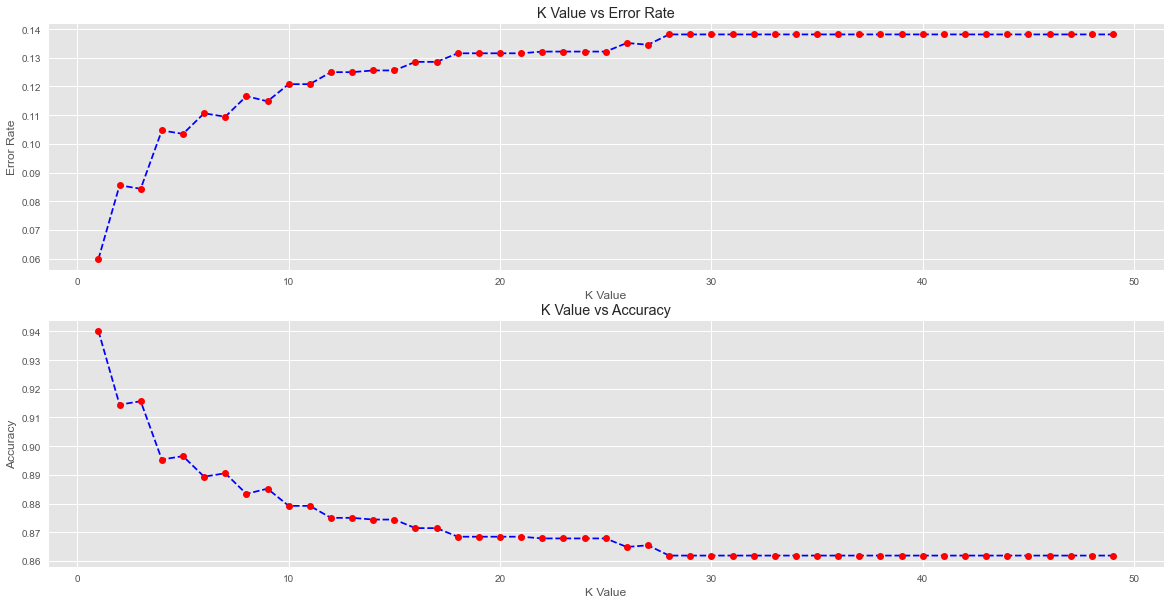

In [312]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

ax1.plot(range(1,50), error, color='blue', marker='o', ls='dashed', markerfacecolor='red')
ax1.set_xlabel('K Value')
ax1.set_ylabel('Error Rate')
ax1.set_title('K Value vs Error Rate')

ax2.plot(range(1,50), accuracy, color='blue', marker='o', ls='dashed', markerfacecolor='red')
ax2.set_xlabel('K Value')
ax2.set_ylabel('Accuracy')
ax2.set_title('K Value vs Accuracy')

# Building a Logistic Regression model prediction. Spam and ham values will be transformed into 1 and 0. 

In [328]:
data = pd.read_csv('datasets_483_982_spam.csv', encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [329]:
def cat(x):
    if x == 'spam':
        return 1
    else:
        return 0

In [330]:
data['v1'] = data['v1'].apply(cat)


In [332]:
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [335]:
pipeline1 = Pipeline([
    ('s1', CountVectorizer(analyzer=cleaner)),
    ('s2', LogisticRegression())
])

In [336]:
pipeline1.fit(X_train, y_train)

C:\Users\90538\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('s1',
                 CountVectorizer(analyzer=<function cleaner at 0x000002263A044F28>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('s2',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=N

In [338]:
pred_pip1 = pipeline1.predict(X_test)

# 98% Accuracy.

In [339]:
print(classification_report(y_test, pred_pip1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1472
           1       0.99      0.82      0.90       200

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



# Building a prediction model using Adaboost Classifer. Tf-idf transformation will be applied this time.

In [340]:
data = pd.read_csv('datasets_483_982_spam.csv', encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data['v1'] = data['v1'].apply(cat)
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [348]:
pipeline2 = Pipeline([
    ('s1', CountVectorizer(analyzer=cleaner)),
    ('s2', TfidfTransformer()),
    ('s3', AdaBoostClassifier())
])

In [349]:
pipeline2.fit(X_train, y_train)
pred_pip2 = pipeline2.predict(X_test)

# 95% Accuracy, which is still a good job.

In [350]:
print(classification_report(y_test, pred_pip2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1449
           1       0.87      0.74      0.80       223

    accuracy                           0.95      1672
   macro avg       0.92      0.86      0.89      1672
weighted avg       0.95      0.95      0.95      1672



# Building a prediction model using Random Forest algorithm. Tf-idf transformation will be applied again.

In [351]:
data = pd.read_csv('datasets_483_982_spam.csv', encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data['v1'] = data['v1'].apply(cat)
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [352]:
pipeline3 = Pipeline([
    ('s1', CountVectorizer(analyzer=cleaner)),
    ('s2', TfidfTransformer()),
    ('s3', RandomForestClassifier())
])

In [353]:
pipeline3.fit(X_train, y_train)
pred_pip3 = pipeline3.predict(X_test)

C:\Users\90538\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 96% Accuracy.

In [354]:
print(classification_report(y_test, pred_pip3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1441
           1       0.98      0.72      0.83       231

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

